In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/research/prompt_engineering/RL
!pip install tiktoken
!pip install --upgrade "httpx<0.28"
import json
import rl
import utils
from openai import OpenAI
with open("config.json") as config_file:
    config = json.load(config_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/research/prompt_engineering/RL


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


The OpenAI API does not have a direct parameter to set a random seed for reproducibility in its responses. The behavior of the models is inherently non-deterministic due to randomness in the generation process.

Initial prompt: Find material entities.
Predictions: [['Functional amyloid', ' CsgA', ' FapC', ' hydrogels', ' gastrointestinal colonization', ' regenerative tissue engineering', ' cell-specific drug release', ' water-purification filters', ' biosensors.'], ['biomaterial', ' drugs', ' proteins', ' mesenchymal stromal cells', ' immune cells', ' synthetic nanostructures', ' biological nanostructures', ' extracellular vesicles'], ['neutrophils', ' monocytes', ' chemokine receptor 2 (CCR2)', ' C-X3-C motif chemokine receptor 1 (CX3CR1)', ' amorphous polylactide implants', ' myeloid cells']]
Scores: [0.6, 0.7058823529411765, 0.923076923076923]
Reward: 0.7429864253393665

0 Find material entities.  entrada 
Reward: 0.8165656565656566
1 Find material entities.  • 
Reward: 0.8005228758169934
2 Find material entities. ex 
Reward: 0.8005228758169934
3 Find material entities. � 
Reward: 0.8005228758169934
4 Find material entities.  Nä 
Reward: 0.8165656565656566
5 Find material entities. ил 
Rewa

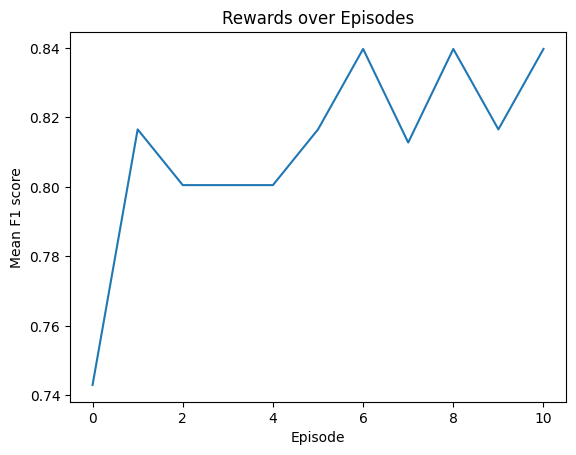

In [2]:
VOCAL = 50000
EPOCHS = 10
PROMPT_LENGTH = 7
PROMPT_INIT = "Find material entities."
LR = 0.001
HIDDEN = 64
SEED = 1234
EXP_ID = 5
PRINT_INTERVAL = 1
SAVE = True
PLOT = True
DATASET = "biomaterials"

PROMPTS, PREDICTIONS, SCORES, REWARDS = rl.do_training(
    prompt_init=PROMPT_INIT, epochs=EPOCHS, learning_rate=LR,
    vocal_size=VOCAL, prompt_length=PROMPT_LENGTH, hidden=HIDDEN, seed=SEED,
    exp_id=EXP_ID, print_interval=PRINT_INTERVAL, save_results=SAVE, plot=PLOT,
    client=OpenAI(api_key=config["OPENAI_API_KEY"]), dataset=DATASET
    )

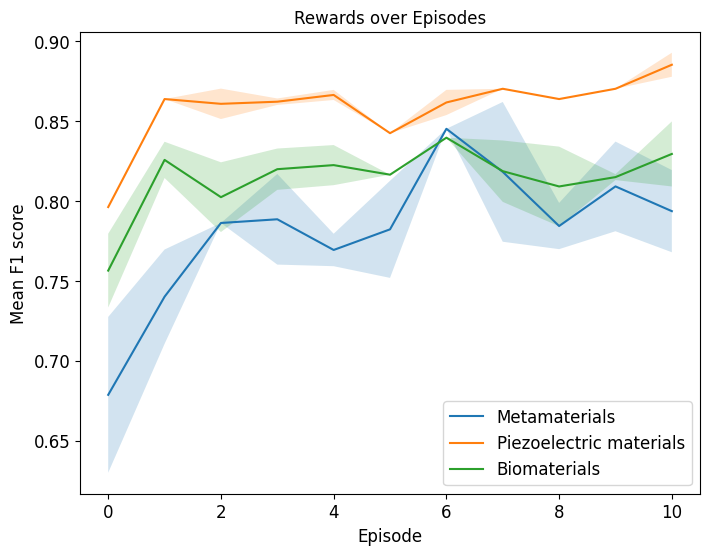

In [2]:
results_metamaterials = utils.load_results("d_metamaterials_p_Find material entities._e_10_l_0.001_v_50000_len_7_h_64_s_1234_id_")
results_piezoelectric = utils.load_results("d_piezoelectric_p_Find material entities._e_10_l_0.001_v_50000_len_7_h_64_s_1234_id_")
results_biomaterials = utils.load_results("d_biomaterials_p_Find material entities._e_10_l_0.001_v_50000_len_7_h_64_s_1234_id_")
utils.plot_results_multiple([results_metamaterials, results_piezoelectric, results_biomaterials],
                            labels=["Metamaterials", "Piezoelectric materials", "Biomaterials"], fontsize=12, figsize=(8, 6))
# all_results = utils.load_results("d_biomaterials_p_Find material entities._e_10_l_0.001_v_50000_len_7_h_64_s_1234_id_")
# utils.plot_results(all_results, fontsize=12, figsize=(8, 6))